# San Francisco Crime Classification: Data Wrangling, Exploratory Data Analysis, Data Visualization and Inferential Statistics


The overall goal of this iPython notebook is for the capstone project - SF Crime Classification. Data Cleaning has been done to get the data in a format needed for further analysis. Data manipulation, and data exploration has been implemented to uncover interesting insights from the data. Data tranformation, and merging different datasets for analysis have been carried out as well. Inferential statistics have also been performed. Finally, Data visualizations have been used to tell a story with the data and get a better understanding of the crime activities.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv('/Users/Anushree/Desktop/Springboard/Capstone 2/data_sf/train.csv')
test = pd.read_csv('/Users/Anushree/Desktop/Springboard/Capstone 2/data_sf/test.csv')

In [3]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [4]:
test.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [5]:
train.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


# Data Cleaning

In [6]:
# check for missing values
total=train.isnull().sum()
total

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

There are no missing values in the train data set so there is no data cleaning required to be done.

In [7]:
percentage=total/train.isnull().count()
percentage

Dates         0.0
Category      0.0
Descript      0.0
DayOfWeek     0.0
PdDistrict    0.0
Resolution    0.0
Address       0.0
X             0.0
Y             0.0
dtype: float64

## Exploratory Data Analysis & Data Visualization

In [8]:
count_dayofweek=train['DayOfWeek'].value_counts()
count_dayofweek

Friday       133734
Wednesday    129211
Saturday     126810
Thursday     125038
Tuesday      124965
Monday       121584
Sunday       116707
Name: DayOfWeek, dtype: int64

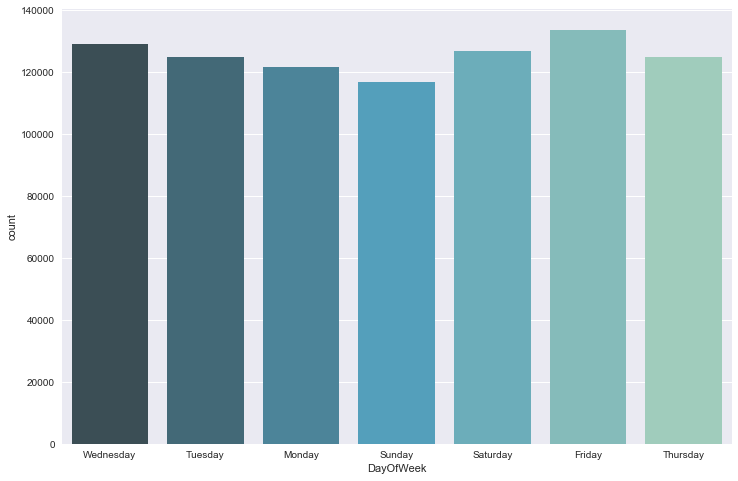

In [9]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="DayOfWeek", data=train,palette='GnBu_d')

From this graph we can see that the crime rate is maximum on Friday followed by Wednesday and least on Sunday. This can be due to the fact that people don't travel much on Sunday's whereas the city is pretty crowded on Fridays.

In [10]:
import datetime as dt

In [11]:
d = pd.to_datetime(train['Dates'])
d.head()

0   2015-05-13 23:53:00
1   2015-05-13 23:53:00
2   2015-05-13 23:33:00
3   2015-05-13 23:30:00
4   2015-05-13 23:30:00
Name: Dates, dtype: datetime64[ns]

In [12]:
train['month'] = d.dt.month

In [13]:
train['hour'] = d.dt.hour

In [14]:
train['year'] = d.dt.year

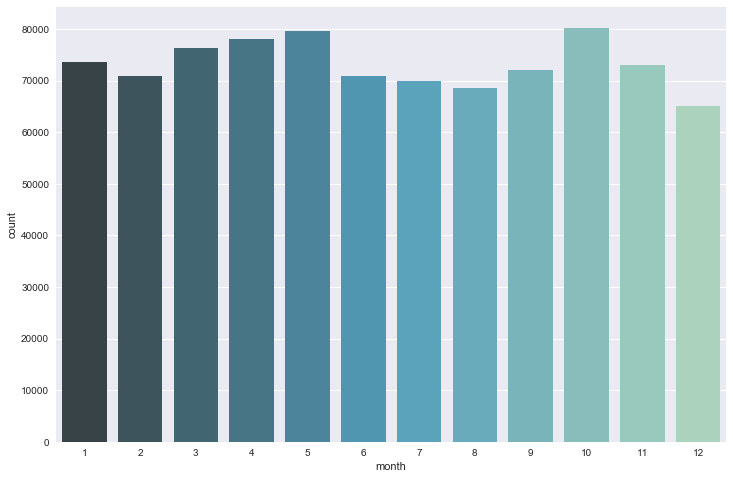

In [15]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="month", data=train,palette='GnBu_d')

Looking at the month countplot we can see that, the highest number of crimes are for the months of October and May, closely followed by April. From this analysis we can see that the number of crimes are more in summer months and relatively lesser in the winter months(December, January, February).

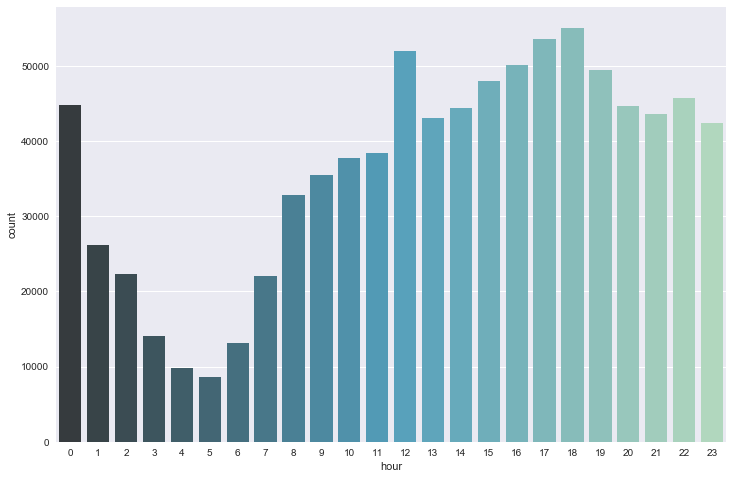

In [16]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="hour", data=train,palette='GnBu_d')

The number of crimes recorded are mostly around 12pm and then at 6pm(in the 5-7pm window).

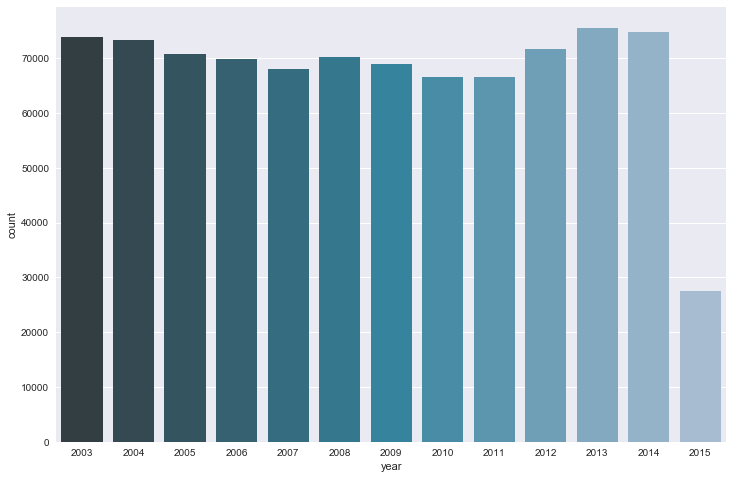

In [17]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="year", data=train,palette="PuBuGn_d")

The lowest number of crimes is in 2015 which is because we have data only until May 2015. The number of crimes reached an all time high in the span of 12 years in 2013. The number of crimes was high at 2003 after which it was decreasing until 2008 where we can see a spike again after which it decreased until 2012-2013. We can see that every 5 years there's a spike in crime rates.

In [18]:
train['PdDistrict'].value_counts()

SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: PdDistrict, dtype: int64

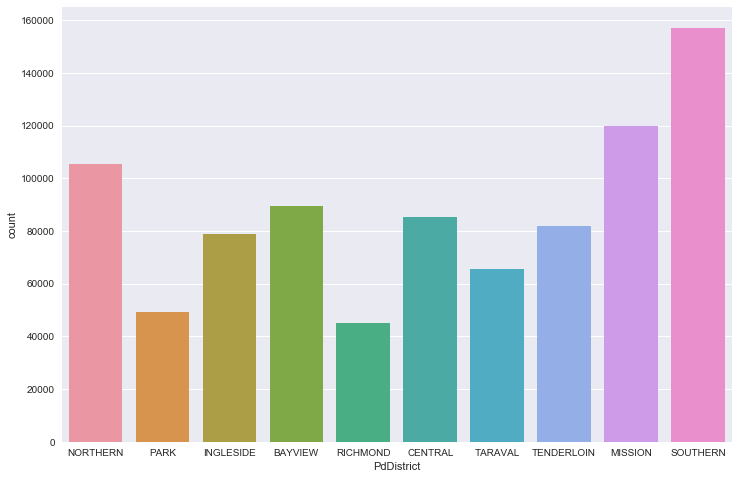

In [19]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="PdDistrict", data=train)

We can see that the most vulnerable areas to crime are the southern, mission and the northern areas. Whereas, Richmond District has the least number of crimes reported.

In [20]:
train['Descript'].value_counts()

GRAND THEFT FROM LOCKED AUTO                                60022
LOST PROPERTY                                               31729
BATTERY                                                     27441
STOLEN AUTOMOBILE                                           26897
DRIVERS LICENSE, SUSPENDED OR REVOKED                       26839
WARRANT ARREST                                              23754
SUSPICIOUS OCCURRENCE                                       21891
AIDED CASE, MENTAL DISTURBED                                21497
PETTY THEFT FROM LOCKED AUTO                                19771
MALICIOUS MISCHIEF, VANDALISM OF VEHICLES                   17789
TRAFFIC VIOLATION                                           16471
PETTY THEFT OF PROPERTY                                     16196
MALICIOUS MISCHIEF, VANDALISM                               15957
THREATS AGAINST LIFE                                        14716
FOUND PROPERTY                                              12146
ENROUTE TO

In [21]:
count_crime = train['Descript'].value_counts().reset_index().head(20)
count_crime.columns=['crime','frequency']

In [22]:
count_crime

,crime,frequency
0,GRAND THEFT FROM LOCKED AUTO,60022
1,LOST PROPERTY,31729
2,BATTERY,27441
3,STOLEN AUTOMOBILE,26897
4,"DRIVERS LICENSE, SUSPENDED OR REVOKED",26839
5,WARRANT ARREST,23754
6,SUSPICIOUS OCCURRENCE,21891
7,"AIDED CASE, MENTAL DISTURBED",21497
8,PETTY THEFT FROM LOCKED AUTO,19771
9,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",17789


In [23]:
grouped=pd.DataFrame(train.groupby(['year','month','DayOfWeek','hour','PdDistrict']).size(), columns=['count'])
grouped.reset_index(inplace=True)
grouped.head()

,year,month,DayOfWeek,hour,PdDistrict,count
0,2003,1,Friday,0,BAYVIEW,3
1,2003,1,Friday,0,CENTRAL,3
2,2003,1,Friday,0,INGLESIDE,1
3,2003,1,Friday,0,MISSION,4
4,2003,1,Friday,0,NORTHERN,8


In [24]:
crime_cat = train['Category'].value_counts().reset_index().head(7)
crime_cat

,index,Category
0,LARCENY/THEFT,174900
1,OTHER OFFENSES,126182
2,NON-CRIMINAL,92304
3,ASSAULT,76876
4,DRUG/NARCOTIC,53971
5,VEHICLE THEFT,53781
6,VANDALISM,44725


In [25]:
crime_cat.columns=['Category','frequency']
#crime_cat = crime_cat.drop(['OTHER OFFENSES','NON-CRIMINAL'])
crime_cat

,Category,frequency
0,LARCENY/THEFT,174900
1,OTHER OFFENSES,126182
2,NON-CRIMINAL,92304
3,ASSAULT,76876
4,DRUG/NARCOTIC,53971
5,VEHICLE THEFT,53781
6,VANDALISM,44725


In [26]:
#crime_cat = crime_cat.drop(['OTHER OFFENSES','NON-CRIMINAL'],axis = 1)
type(crime_cat)

pandas.core.frame.DataFrame

In [27]:
#crime_cat = dropcrime_cat[crime_cat['category']=='OTHER OFFENSES'], axis =1)

In [28]:
crime_cat = crime_cat.drop(crime_cat.index[1])

In [29]:
crime_cat

,Category,frequency
0,LARCENY/THEFT,174900
2,NON-CRIMINAL,92304
3,ASSAULT,76876
4,DRUG/NARCOTIC,53971
5,VEHICLE THEFT,53781
6,VANDALISM,44725


In [30]:
crime_cat=crime_cat.drop(crime_cat.index[1])


In [31]:
crime_cat

,Category,frequency
0,LARCENY/THEFT,174900
3,ASSAULT,76876
4,DRUG/NARCOTIC,53971
5,VEHICLE THEFT,53781
6,VANDALISM,44725


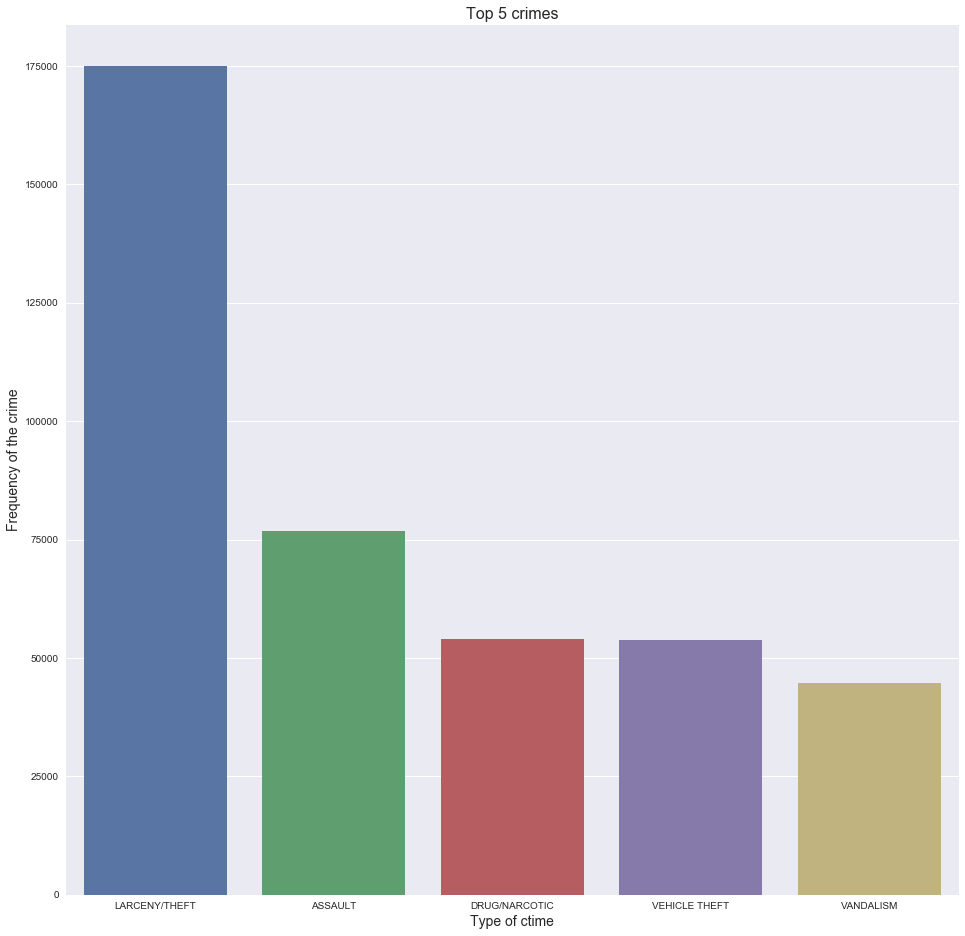

In [32]:
plt.figure(figsize=(16,16))
sns.barplot(crime_cat.Category, crime_cat.frequency)
plt.ylabel('Frequency of the crime', fontsize=14)
plt.xlabel('Type of ctime', fontsize=14)
plt.title('Top 5 crimes', fontsize=16)

By plotting the top 5 crimes of the SF region, larceny/theft tops the list follwed by assault.

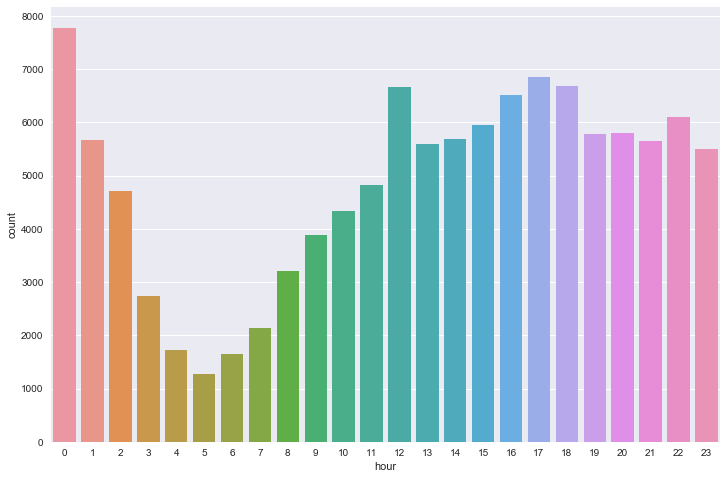

In [33]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='hour',data=train[train['DayOfWeek']=='Sunday'])

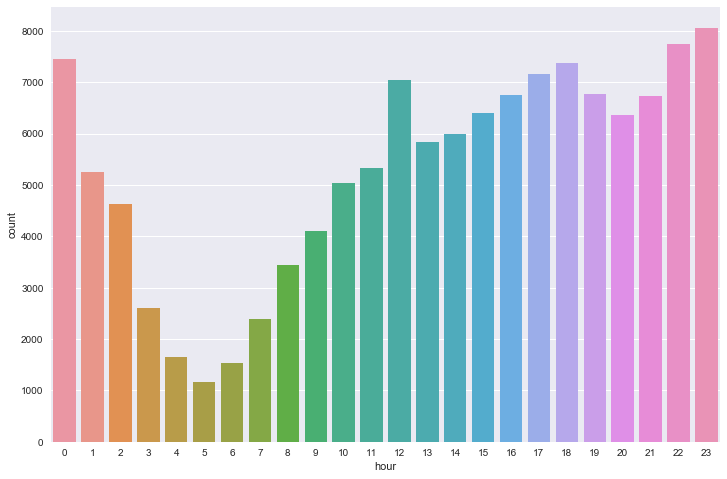

In [34]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='hour',data=train[train['DayOfWeek']=='Saturday'])

From the above two graphs we can see that, the crime activity increases in the weekend at night on saturday from 10pm-12AM.

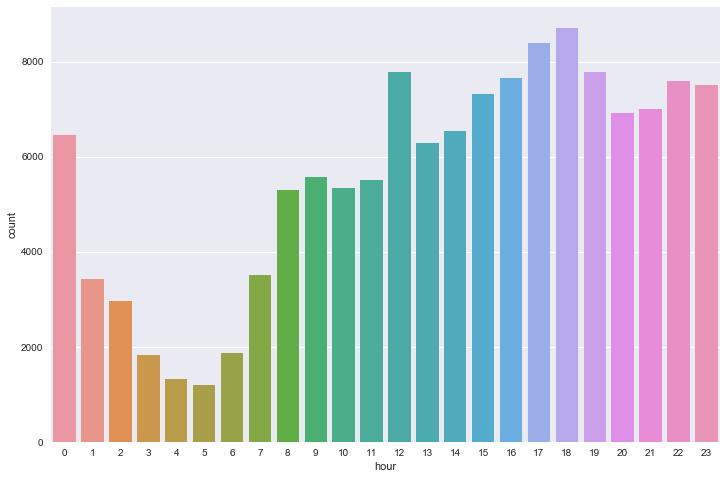

In [35]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='hour',data=train[train['DayOfWeek']=='Friday'])

Whereas on Friday the crime activity is most at 6pm. This might be due to the fact that the city is overly crowded with people coming to the city and leaving the city around this time.

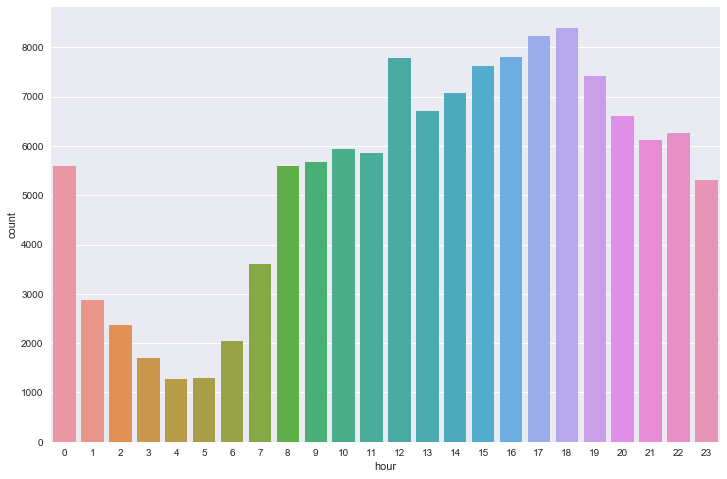

In [36]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='hour',data=train[train['DayOfWeek']=='Wednesday'])

In [37]:
crime_res = train['Resolution'].value_counts().reset_index()

In [38]:
crime_res.head()

,index,Resolution
0,NONE,526790
1,"ARREST, BOOKED",206403
2,"ARREST, CITED",77004
3,LOCATED,17101
4,PSYCHOPATHIC CASE,14534


In [39]:
crime_res = crime_res.drop(crime_res.index[0])
crime_res.columns=['resolution','frequency']
crime_res

,resolution,frequency
1,"ARREST, BOOKED",206403
2,"ARREST, CITED",77004
3,LOCATED,17101
4,PSYCHOPATHIC CASE,14534
5,UNFOUNDED,9585
6,JUVENILE BOOKED,5564
7,COMPLAINANT REFUSES TO PROSECUTE,3976
8,DISTRICT ATTORNEY REFUSES TO PROSECUTE,3934
9,NOT PROSECUTED,3714
10,JUVENILE CITED,3332


In [40]:
merged = pd.merge(crime_cat,train, on='Category', how='left')
merged

,Category,frequency,Dates,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,month,hour,year
0,LARCENY/THEFT,174900,2015-05-13 23:30:00,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,5,23,2015
1,LARCENY/THEFT,174900,2015-05-13 23:30:00,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,5,23,2015
2,LARCENY/THEFT,174900,2015-05-13 23:30:00,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431,5,23,2015
3,LARCENY/THEFT,174900,2015-05-13 23:00:00,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601,5,23,2015
4,LARCENY/THEFT,174900,2015-05-13 23:00:00,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802,5,23,2015
5,LARCENY/THEFT,174900,2015-05-13 22:58:00,PETTY THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802,5,22,2015
6,LARCENY/THEFT,174900,2015-05-13 22:06:00,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,FILLMORE ST / GEARY BL,-122.432915,37.784353,5,22,2015
7,LARCENY/THEFT,174900,2015-05-13 21:30:00,GRAND THEFT FROM LOCKED AUTO,Wednesday,INGLESIDE,NONE,200 Block of EVELYN WY,-122.449389,37.742669,5,21,2015
8,LARCENY/THEFT,174900,2015-05-13 21:10:00,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,FILLMORE ST / LOMBARD ST,-122.436049,37.799841,5,21,2015
9,LARCENY/THEFT,174900,2015-05-13 21:00:00,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,2000 Block of BUSH ST,-122.431018,37.787388,5,21,2015


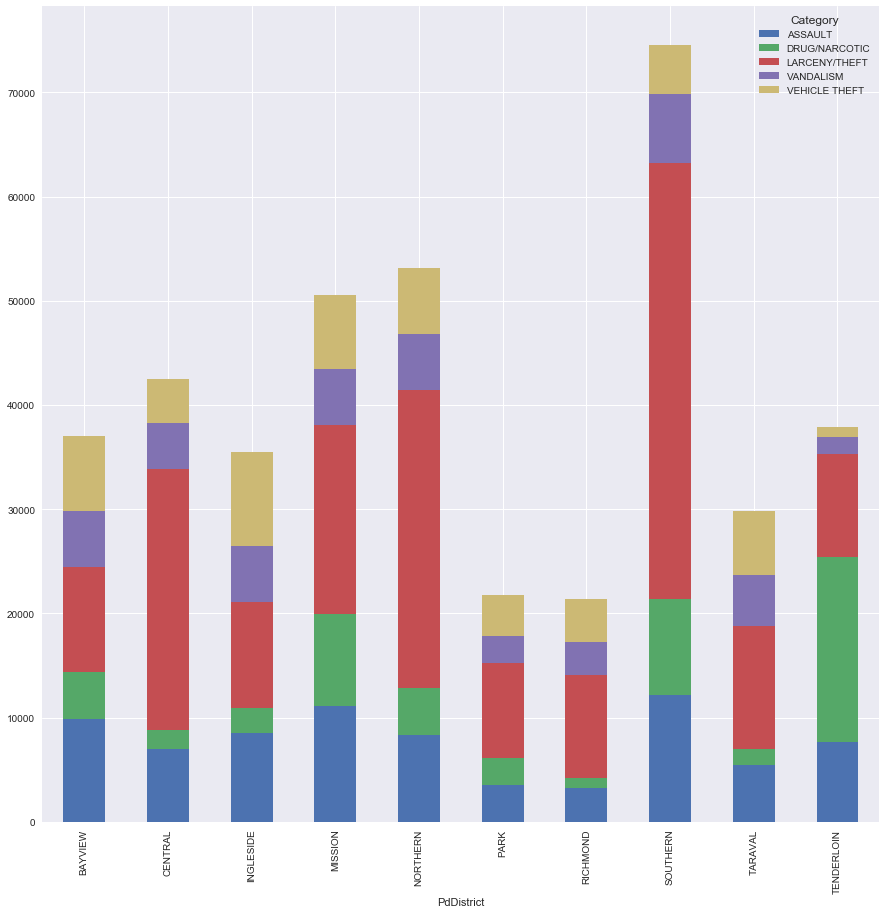

In [41]:
tmp=pd.DataFrame(merged.groupby(['PdDistrict','Category']).size(), columns=['count'])
tmp.reset_index(inplace=True)
tmp=tmp.pivot(index='PdDistrict',columns='Category',values='count')
fig, axes = plt.subplots(1,1,figsize=(15,15))
#colors = plt.cm.BuGn(np.linspace(0, 1,5))
tmp.plot(ax=axes,kind='bar', stacked=True)

From the above graph, we can see that that larceny comprises of majority of the crimes committed. However, the Tenderloin district is an exception where the drug/narcotic category is 

In [42]:
train_burglary = train[train['Category']=="BURGLARY"]
train_burglary.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,month,hour,year
49,2015-05-13 19:52:00,BURGLARY,"BURGLARY, VEHICLE (ARREST MADE)",Wednesday,PARK,"ARREST, BOOKED",1500 Block of HAIGHT ST,-122.447761,37.769846,5,19,2015
87,2015-05-13 18:30:00,BURGLARY,"BURGLARY OF RESIDENCE, ATTEMPTED FORCIBLE ENTRY",Wednesday,BAYVIEW,NONE,1300 Block of FELTON ST,-122.417938,37.726605,5,18,2015
97,2015-05-13 18:00:00,BURGLARY,"BURGLARY OF APARTMENT HOUSE, UNLAWFUL ENTRY",Wednesday,SOUTHERN,NONE,0 Block of 6TH ST,-122.409504,37.781526,5,18,2015
104,2015-05-13 17:55:00,BURGLARY,"BURGLARY,STORE UNDER CONSTRUCTION, UNLAWFUL ENTRY",Wednesday,SOUTHERN,"ARREST, BOOKED",1200 Block of MARKET ST,-122.415449,37.778294,5,17,2015
124,2015-05-13 17:20:00,BURGLARY,"BURGLARY OF HOTEL ROOM, UNLAWFUL ENTRY",Wednesday,CENTRAL,NONE,600 Block of JONES ST,-122.413298,37.787058,5,17,2015


In [43]:
weekdays = {'Monday':0., 'Tuesday':1., 'Wednesday':2., 'Thursday': 3., 'Friday':4., 'Saturday':5., 'Sunday':6.}

In [44]:
train['Day_Num'] = [int(weekdays[w]) for w in train.DayOfWeek]

In [45]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,month,hour,year,Day_Num
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,5,23,2015,2
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,5,23,2015,2
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,5,23,2015,2
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,5,23,2015,2
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,5,23,2015,2


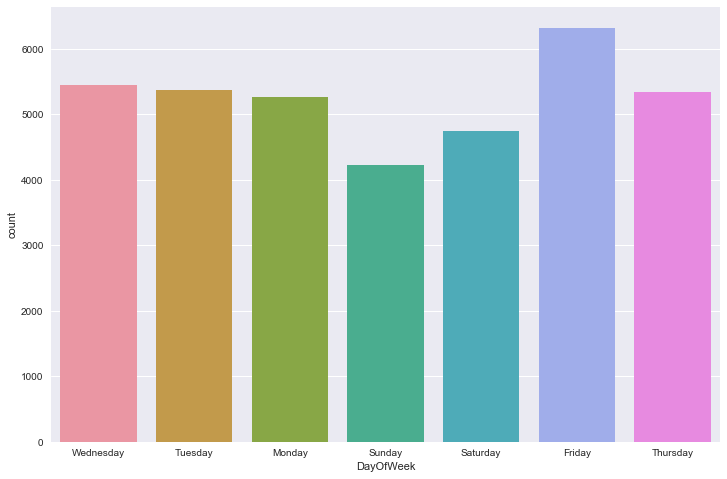

In [46]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='DayOfWeek',data=train_burglary)

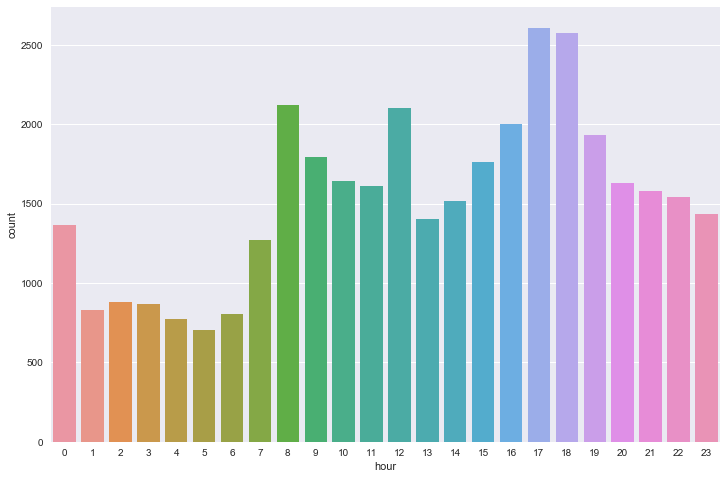

In [47]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='hour',data=train_burglary)

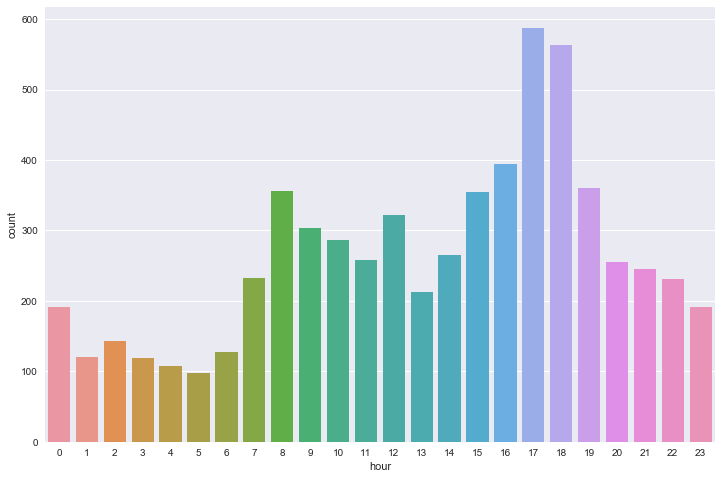

In [48]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='hour',data=train_burglary[train_burglary['DayOfWeek']=='Friday'])

The burglary is maximum on Fridays so checking the hourly activity on Friday, we can see that 5pm on Friday is most prone to burglaries.

In [49]:
train_assault = train[train['Category']=="ASSAULT"]
train_assault.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,month,hour,year,Day_Num
17,2015-05-13 21:55:00,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Wednesday,INGLESIDE,NONE,GODEUS ST / MISSION ST,-122.421682,37.742822,5,21,2015,2
51,2015-05-13 19:33:00,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Wednesday,BAYVIEW,NONE,23RD ST / WISCONSIN ST,-122.398696,37.754746,5,19,2015,2
109,2015-05-13 17:47:00,ASSAULT,CHILD ABUSE (PHYSICAL),Wednesday,BAYVIEW,NONE,0 Block of WHITFIELD CT,-122.381838,37.731104,5,17,2015,2
114,2015-05-13 17:40:00,ASSAULT,THREATS AGAINST LIFE,Wednesday,CENTRAL,NONE,1400 Block of STOCKTON ST,-122.409032,37.799253,5,17,2015,2
165,2015-05-13 15:40:00,ASSAULT,"BATTERY, FORMER SPOUSE OR DATING RELATIONSHIP",Wednesday,PARK,NONE,1700 Block of MCALLISTER ST,-122.440880,37.777532,5,15,2015,2


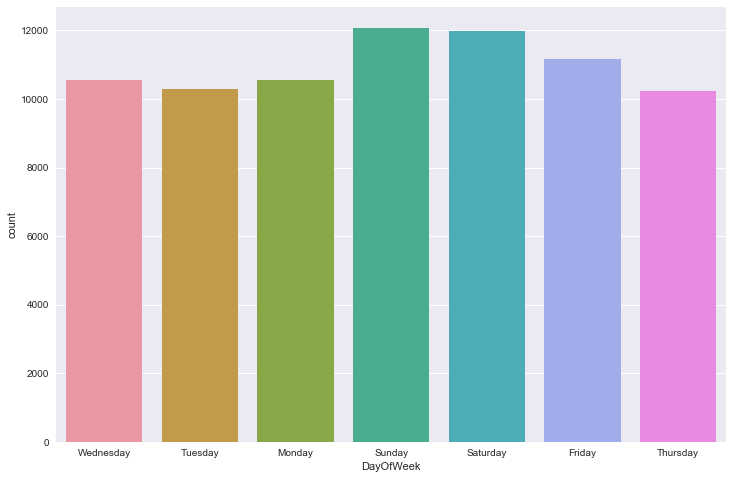

In [50]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='DayOfWeek',data=train_assault)

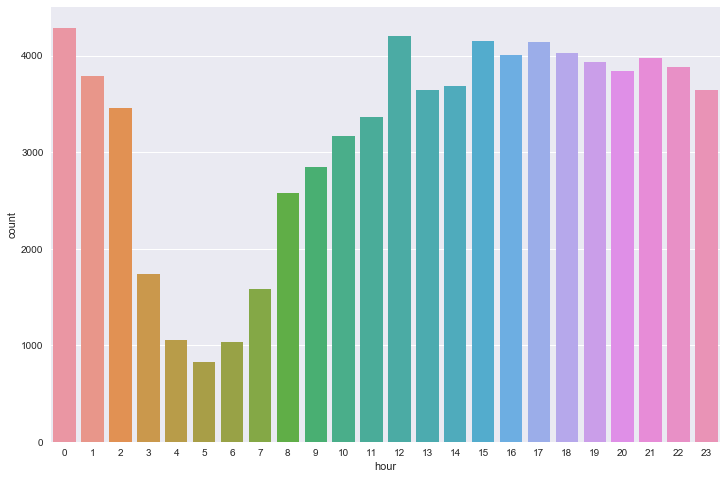

In [51]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='hour',data=train_assault)

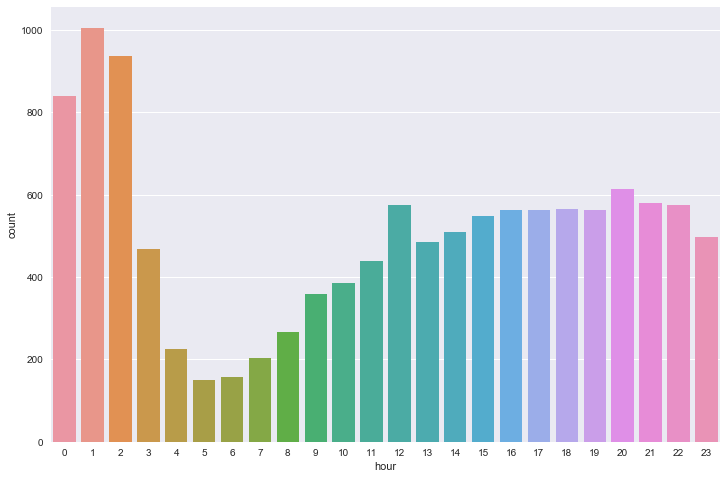

In [52]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='hour',data=train_assault[train_assault['DayOfWeek']=='Sunday'])

Although the general trend for assault is that, it's maximum around 12pm. Looking at the graph for Sunday(when most number of assaults are recorded), it shows it's around 1AM.

In [53]:
train_drug = train[train['Category']=="DRUG/NARCOTIC"]
train_drug.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,month,hour,year,Day_Num
107,2015-05-13 17:47:00,DRUG/NARCOTIC,POSSESSION OF NARCOTICS PARAPHERNALIA,Wednesday,BAYVIEW,NONE,0 Block of WHITFIELD CT,-122.381838,37.731104,5,17,2015,2
125,2015-05-13 17:12:00,DRUG/NARCOTIC,POSSESSION OF MARIJUANA,Wednesday,SOUTHERN,"ARREST, BOOKED",6TH ST / NATOMA ST,-122.407693,37.780163,5,17,2015,2
184,2015-05-13 14:31:00,DRUG/NARCOTIC,POSSESSION OF MARIJUANA FOR SALES,Wednesday,PARK,"ARREST, BOOKED",1600 Block of HAIGHT ST,-122.449123,37.769784,5,14,2015,2
185,2015-05-13 14:31:00,DRUG/NARCOTIC,SALE OF MARIJUANA,Wednesday,PARK,"ARREST, BOOKED",1600 Block of HAIGHT ST,-122.449123,37.769784,5,14,2015,2
220,2015-05-13 13:19:00,DRUG/NARCOTIC,POSSESSION OF NARCOTICS PARAPHERNALIA,Wednesday,MISSION,"ARREST, BOOKED",17TH ST / MISSION ST,-122.419516,37.763429,5,13,2015,2


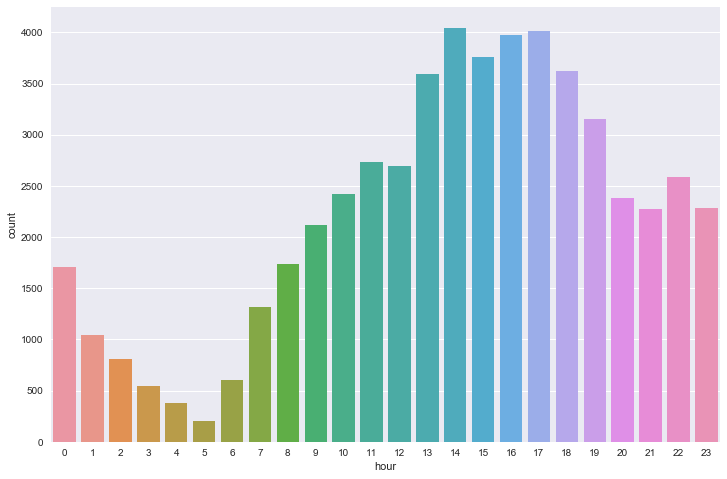

In [54]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='hour',data=train_drug)

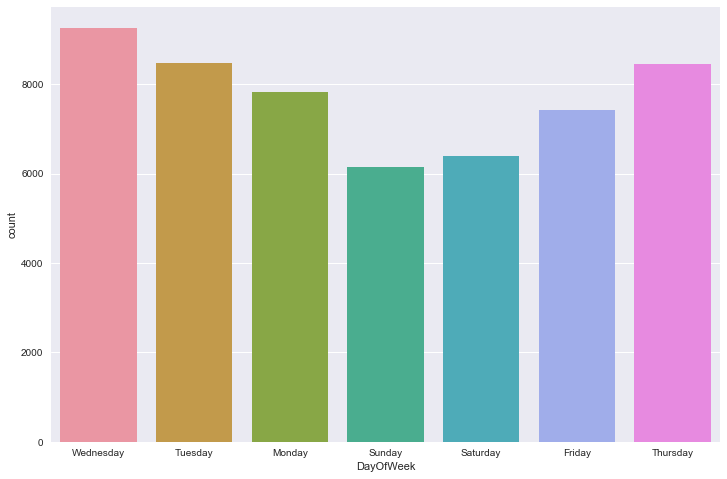

In [55]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='DayOfWeek',data=train_drug)

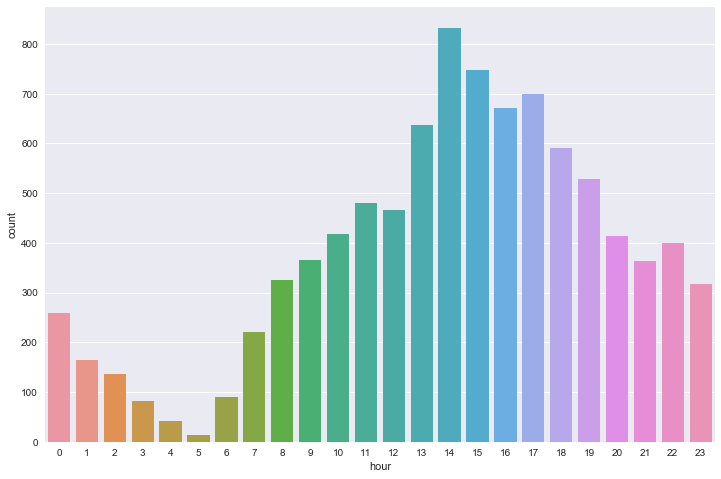

In [56]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='hour',data=train_drug[train_drug['DayOfWeek']=='Wednesday'])

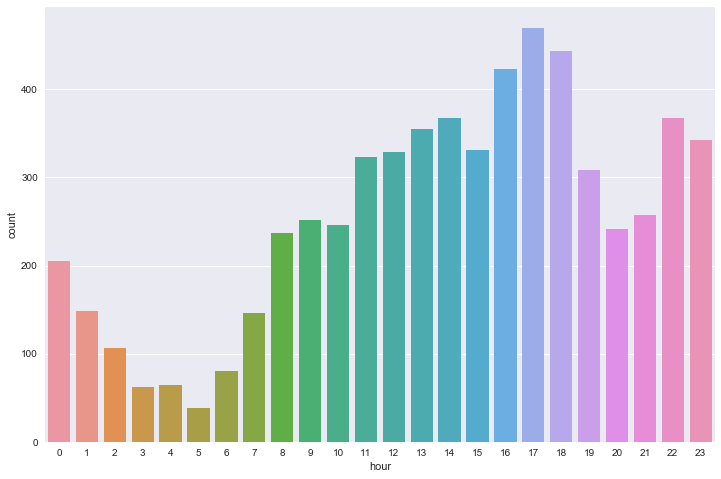

In [57]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='hour',data=train_drug[train_drug['DayOfWeek']=='Sunday'])

Although the overall crime recorded is the least on Wednesday the number of crimes due to drug or narcotic is most on Wednesday and specifically at 2pm on Wednesday.

In [58]:
train_larceny = train[train['Category']=="LARCENY/THEFT"]
train_larceny.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,month,hour,year,Day_Num
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,5,23,2015,2
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,5,23,2015,2
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431,5,23,2015,2
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601,5,23,2015,2
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802,5,23,2015,2


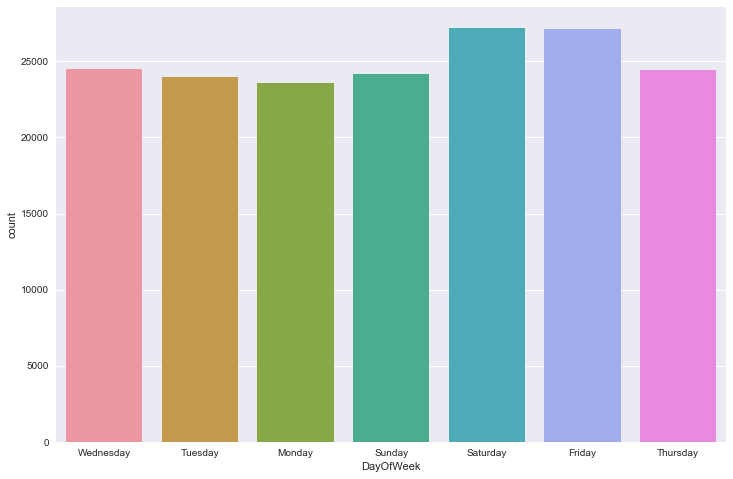

In [59]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='DayOfWeek',data=train_larceny)

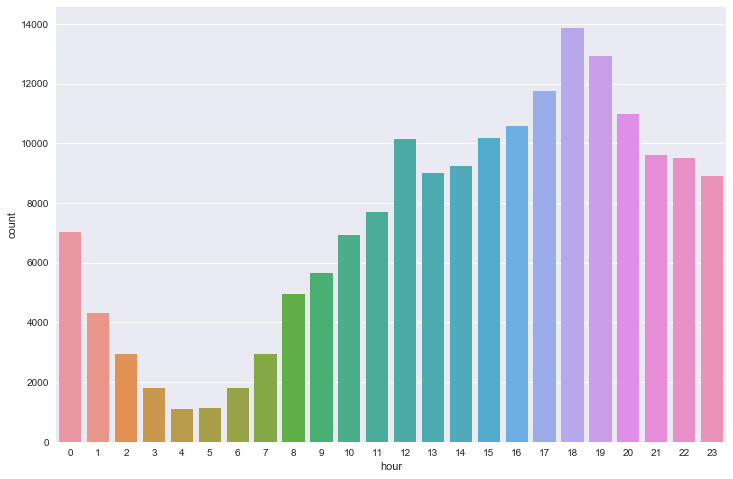

In [60]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='hour',data=train_larceny)

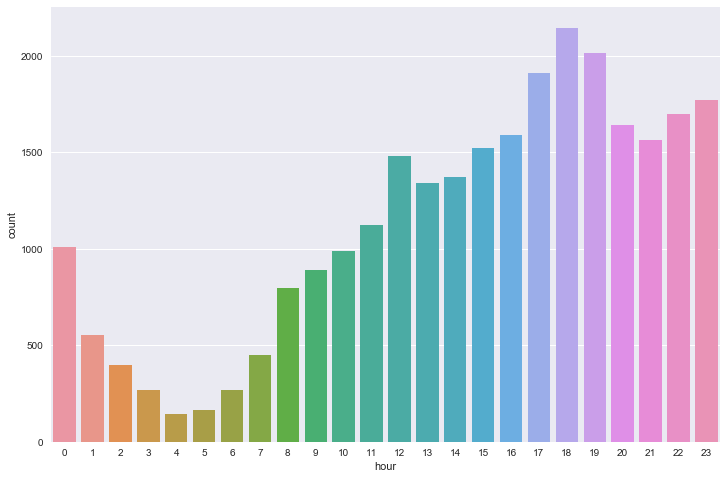

In [61]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='hour',data=train_larceny[train_larceny['DayOfWeek']=='Friday'])

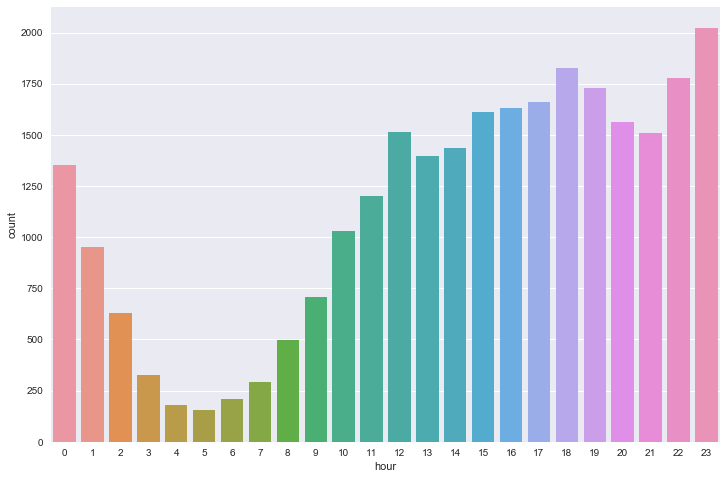

In [62]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='hour',data=train_larceny[train_larceny['DayOfWeek']=='Saturday'])

The larceny category has most number of crimes recorded on Saturday followed by Friday. Looking at the hourly distribution we can see that for Friday it's maximum at 6pm whereas on Saturday it's at it's peak at 11pm.

In [63]:
train_vandalism = train[train['Category']=="VANDALISM"]
train_vandalism.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,month,hour,year,Day_Num
12,2015-05-13 22:30:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Wednesday,TENDERLOIN,NONE,TURK ST / JONES ST,-122.412414,37.783004,5,22,2015,2
32,2015-05-13 20:45:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Wednesday,NORTHERN,NONE,1500 Block of FILLMORE ST,-122.432744,37.783842,5,20,2015,2
34,2015-05-13 20:30:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Wednesday,NORTHERN,NONE,1600 Block of WEBSTER ST,-122.431310,37.785871,5,20,2015,2
39,2015-05-13 20:25:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Wednesday,INGLESIDE,NONE,0 Block of WINDING WY,-122.432446,37.710833,5,20,2015,2
126,2015-05-13 17:07:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Wednesday,NORTHERN,NONE,1100 Block of FILLMORE ST,-122.431980,37.780048,5,17,2015,2


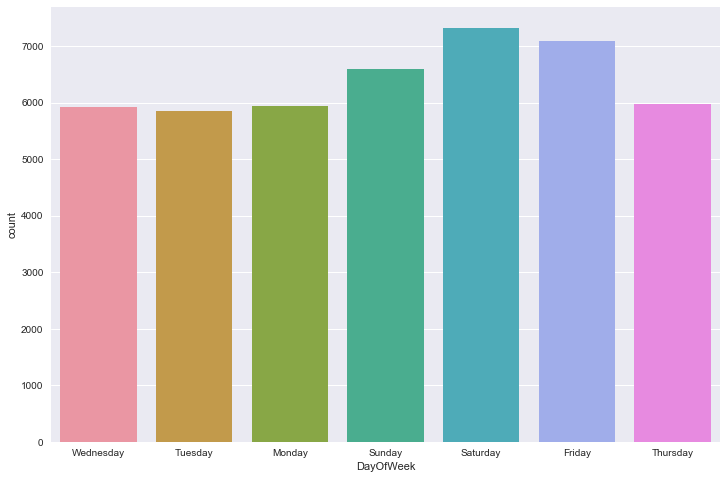

In [64]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='DayOfWeek',data=train_vandalism)

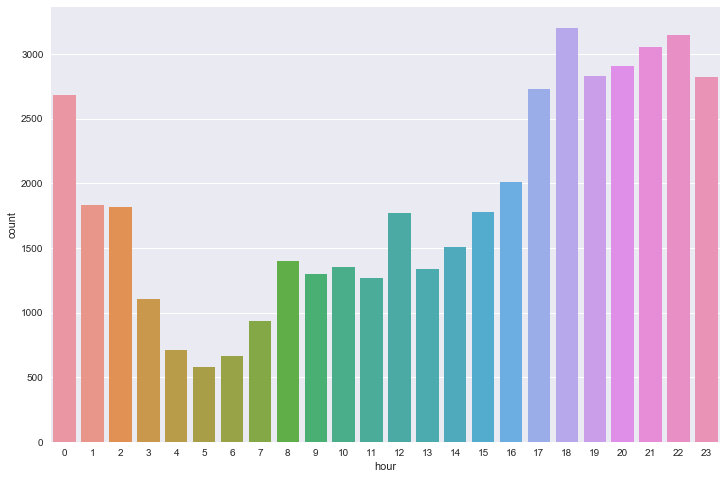

In [65]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='hour',data=train_vandalism)

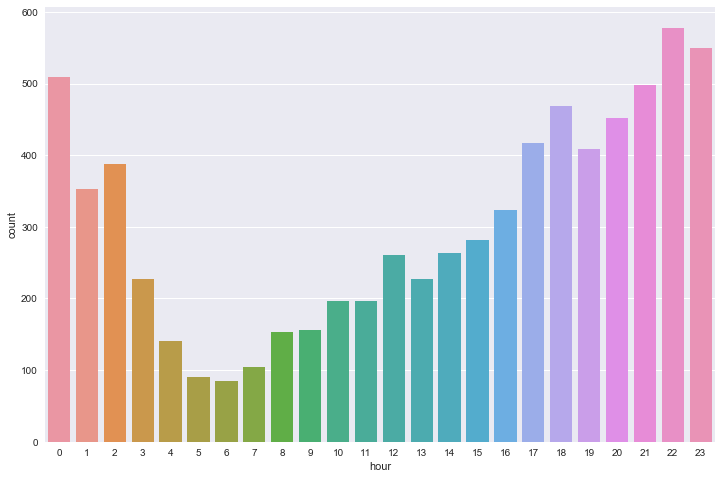

In [66]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='hour',data=train_vandalism[train_vandalism['DayOfWeek']=='Saturday'])

The maximum crime activity recorded due to vandalism is on Saturday at 10pm.

In [67]:
train_vehicle = train[train['Category']=="VEHICLE THEFT"]
train_vehicle.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,month,hour,year,Day_Num
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138,5,23,2015,2
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,5,23,2015,2
46,2015-05-13 20:00:00,VEHICLE THEFT,STOLEN MOTORCYCLE,Wednesday,INGLESIDE,NONE,0 Block of CRESCENT AV,-122.423702,37.735233,5,20,2015,2
59,2015-05-13 19:28:00,VEHICLE THEFT,STOLEN AND RECOVERED VEHICLE,Wednesday,CENTRAL,NONE,0 Block of SANSOME ST,-122.400720,37.790712,5,19,2015,2
60,2015-05-13 19:28:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,CENTRAL,NONE,0 Block of SANSOME ST,-122.400720,37.790712,5,19,2015,2


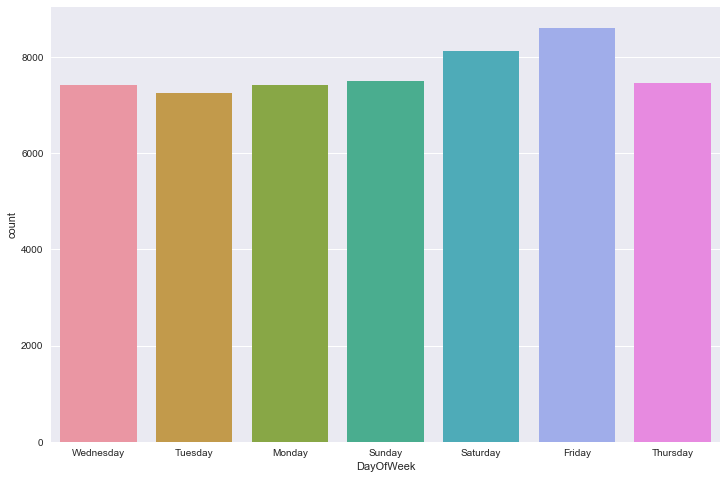

In [68]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='DayOfWeek',data=train_vehicle)

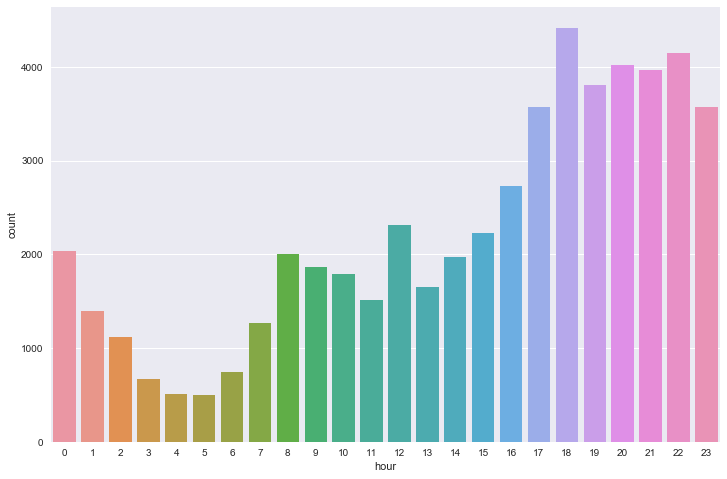

In [69]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='hour',data=train_vehicle)

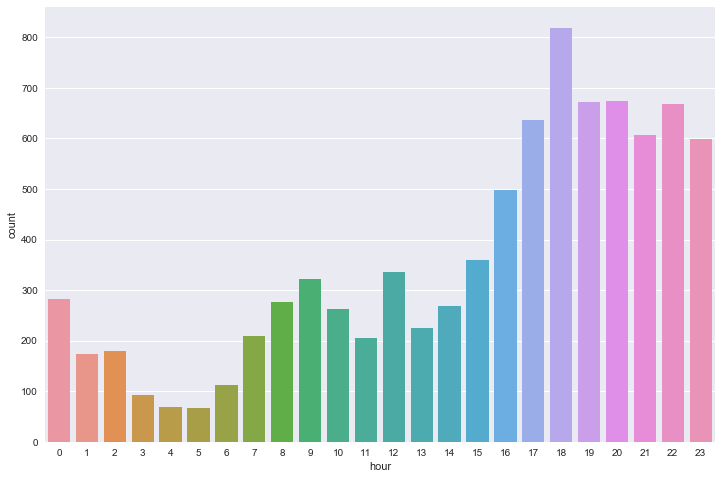

In [70]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='hour',data=train_vehicle[train_vehicle['DayOfWeek']=='Friday'])

The vehicle theft is recorded maximum on Friday at 6pm. 

# Inferential Statistics

In [73]:
from scipy import stats

In [74]:
from scipy.stats import norm

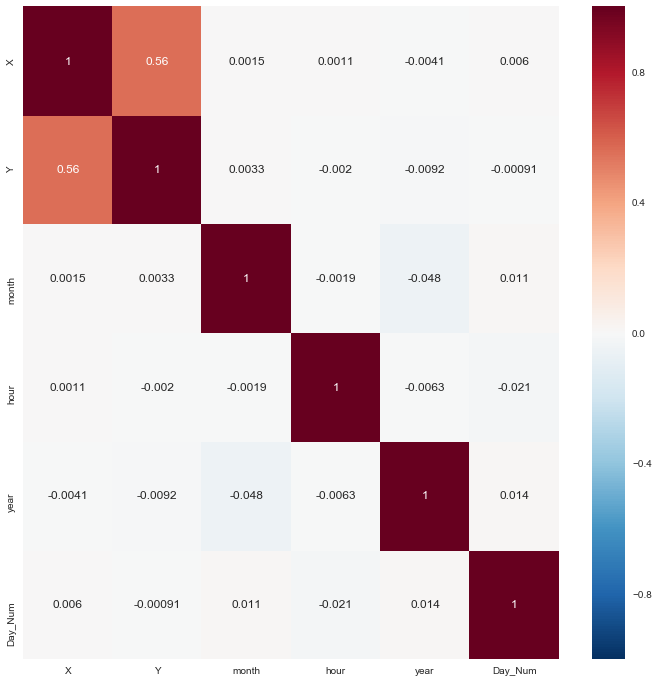

In [75]:
plt.figure(figsize=(12,12))
corr_train = train.corr()
sns.heatmap(corr_train, 
            xticklabels=corr_train.columns.values,
            yticklabels=corr_train.columns.values, annot= True)

In [76]:
stats.normaltest(train.hour, axis=0)

NormaltestResult(statistic=72372.902394654346, pvalue=0.0)

In [78]:
stats.normaltest(train.Day_Num, axis=0)

NormaltestResult(statistic=985880.58049099881, pvalue=0.0)

In [79]:
stats.normaltest(train.month, axis=0)

NormaltestResult(statistic=972536.32854266977, pvalue=0.0)

In [80]:
stats.normaltest(train.year, axis=0)

NormaltestResult(statistic=1057606.7165465287, pvalue=0.0)

In [81]:
stats.normaltest(train.X, axis=0)

NormaltestResult(statistic=1898043.7311081742, pvalue=0.0)

In [82]:
stats.normaltest(train.Y, axis=0)

NormaltestResult(statistic=3626583.8694200409, pvalue=0.0)

In [83]:
anderson_results_hour = stats.anderson(train.hour)
print(anderson_results_hour)

AndersonResult(statistic=12253.44913654495, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [84]:
anderson_results_year = stats.anderson(train.year)
print(anderson_results_year)

AndersonResult(statistic=13806.071284624049, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [85]:
anderson_results_month = stats.anderson(train.month)
print(anderson_results_month)

AndersonResult(statistic=13806.374536399613, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [87]:
anderson_results_Day_Num = stats.anderson(train.Day_Num)
print(anderson_results_Day_Num)

AndersonResult(statistic=19935.871091063716, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [88]:
anderson_results_X = stats.anderson(train.X)
print(anderson_results_X)

AndersonResult(statistic=inf, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


/anaconda/lib/python3.6/site-packages/scipy/stats/morestats.py:1461: RuntimeWarning: divide by zero encountered in log
  A2 = -N - np.sum((2*i - 1.0) / N * (log(z) + log(1 - z[::-1])), axis=0)


In [89]:
anderson_results_Y = stats.anderson(train.Y)
print(anderson_results_Y)

AndersonResult(statistic=inf, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


/anaconda/lib/python3.6/site-packages/scipy/stats/morestats.py:1461: RuntimeWarning: divide by zero encountered in log
  A2 = -N - np.sum((2*i - 1.0) / N * (log(z) + log(1 - z[::-1])), axis=0)
